Student       0
Python        0
SQL           0
PowerBI       0
Total         0
Percentage    0
Grade         0
dtype: int64

---Data after filling missing values---
     Student  Python  SQL  PowerBI  Total  Percentage Grade
0  Student_1      63   68       57    188       62.67     C
1  Student_2      66   90       56    212       70.67     B
2  Student_3      75   57       45    177       59.00     C
3  Student_4      81   82       46    209       69.67     C
4  Student_5      91   55       63    209       69.67     C

----Subject wise average---
Python     74.266667
SQL        67.266667
PowerBI    63.500000
dtype: float64

----Subject wise max---
Python     98
SQL        99
PowerBI    94
dtype: int64

----Subject wise min---
Python     42
SQL        41
PowerBI    41
dtype: int64

----Subject wise standard deviation---
Python     15.429335
SQL        17.156347
PowerBI    13.708165
dtype: float64

----Updated Data with Total, Percentage and Grade---
     Student  Python  SQL  PowerBI 

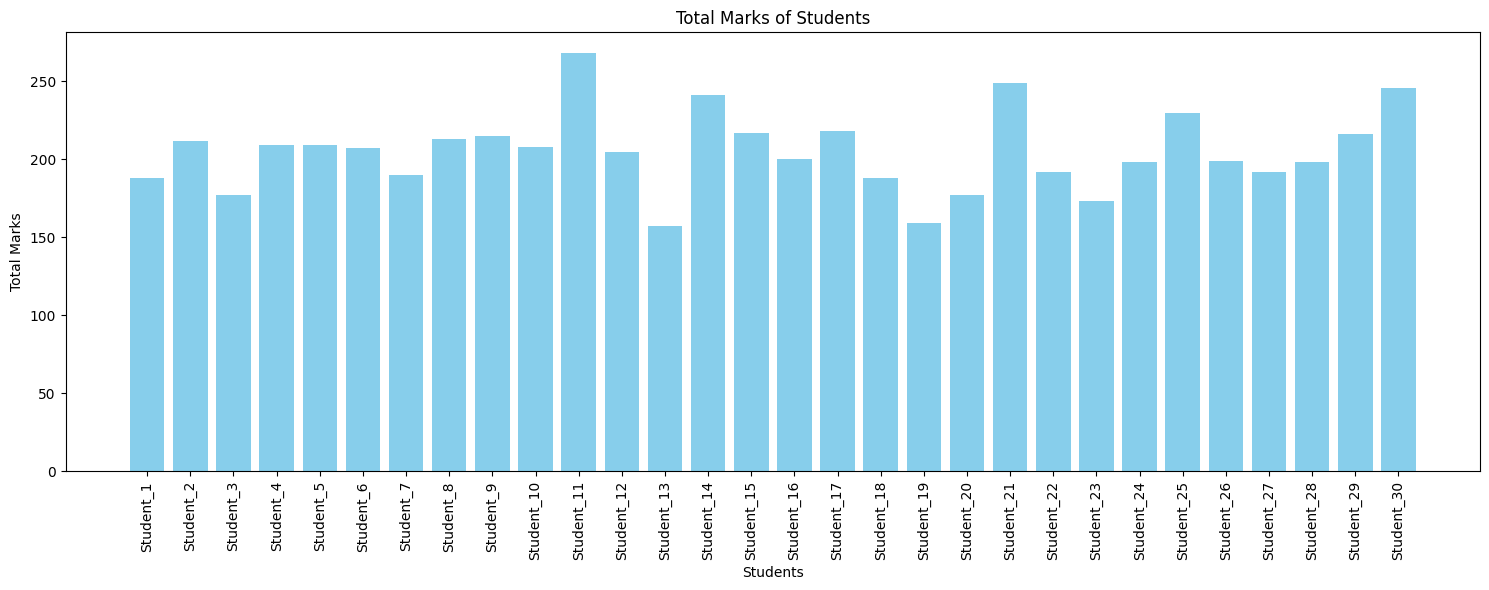

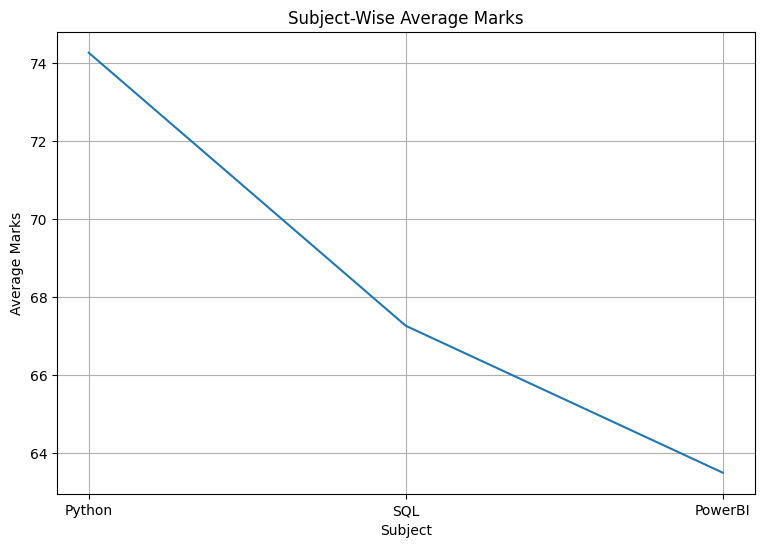

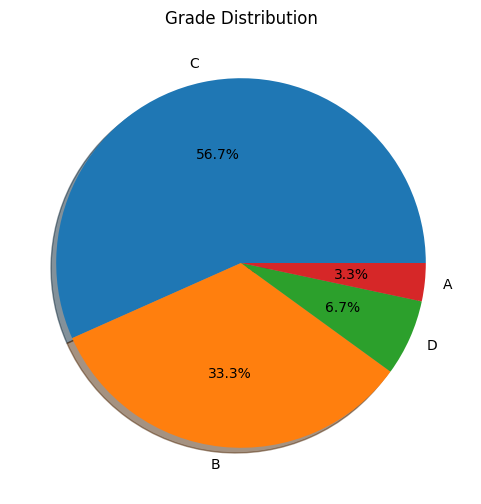

Saved!


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data set
df = pd.read_csv("student_marks.csv")

# Handle missing values
print(df.isnull().sum())
df.fillna(df.mean(numeric_only=True), inplace=True)
print("\n---Data after filling missing values---")
print(df.head())

Subject = ["Python", "SQL", "PowerBI"]

print("\n----Subject wise average---")
print(df[Subject].mean())

print("\n----Subject wise max---")
print(df[Subject].max())

print("\n----Subject wise min---")
print(df[Subject].min())

print("\n----Subject wise standard deviation---")
print(df[Subject].std())

# Add the Total, Percentage, Grade
df['Total'] = df[Subject].sum(axis=1)
df['Percentage'] = df['Total'] / (len(Subject) * 100) * 100

def assign_grade(percentage):
    if percentage >= 85:
        return 'A'
    elif percentage >= 70:
        return 'B'
    elif percentage >= 55:
        return 'C'
    else:
        return 'D'

df['Grade'] = df['Percentage'].apply(assign_grade)
print("\n----Updated Data with Total, Percentage and Grade---")
print(df.head())

# Filters / conditions

# Top 5 students
top_5_students = df.sort_values('Total', ascending=False).head(5)
print("\n----Top 5 Students based on Total Marks---")
print(top_5_students)

# Students who scored above 85 in PowerBI
high_powerBI = df[df['PowerBI'] > 85]
print("\n----Students with high PowerBI marks (>85)---")
print(high_powerBI)

# Students who scored below 40 in any subject
low_scorers = df[(df['Python'] < 40) | (df['SQL'] < 40) | (df['PowerBI'] < 40)]
print("\n---Students scoring below 40 in any subject---")
print(low_scorers.head())

# Plot the visualizations
plt.figure(figsize=(15, 6))
plt.bar(df['Student'], df['Total'], color='skyblue')
plt.xlabel('Students')
plt.ylabel('Total Marks')
plt.title('Total Marks of Students')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#student Wise Average Performance
plt.figure(figsize=(9,6))
plt.plot(Subject,df[Subject].mean())
plt.title("Subject-Wise Average Marks")
plt.xlabel("Subject")
plt.ylabel("Average Marks")
plt.grid(True)
plt.show()

# Grade Distribution
plt.figure(figsize=(6,6))
df["Grade"].value_counts().plot.pie(autopct="%1.1f%%",shadow=True)
plt.title("Grade Distribution")
plt.ylabel("")
plt.show()

# Save Output
df.to_csv("student_marks_analysis_output.csv", index=False)
print("Saved!")
